<a href="https://colab.research.google.com/github/kslote1/Data-Driven-Dynamics/blob/main/chapter_one/tensor_decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensor Decomposition

![Tensor](https://raw.githubusercontent.com/mohammadbashiri/tensor-decomposition-in-python/master/figures/d-way.png)


**Tensor**: A tensor is a **multidimensional array**. Also known as **d-way array**, in which \"d\" stands for \"dimensions\". Hence, pretty much all of the geometrical data structures we work with are tensors. Up until $d=2$, these tensors have specific names:\n",
- zero-way tensor: **scalar**\n",
- one-way tensor: **vector**\n",
- two-way tensor: **matrix**\n",

One thing to keep in mind, that might be helpful to know for the following sections, is that as the dimensions of the data structure increases we need more values to locate a single element of our data structure. For instance, we can locate any element of a matrix using two values $(i, j)$ and any element of a tensor via three values $(i, j, k)$. Here is a visual representation (up until three-way tensors)

![decomposition](https://raw.githubusercontent.com/mohammadbashiri/tensor-decomposition-in-python/master/figures/tensor-decomposition.png)



[Mostly taken from here 🖖](https://github.com/mohammadbashiri/tensor-decomposition-in-python)

## Definitions

### Kronecker Product
The Kronecker product of two matrices $A \in \mathbb{R}^{m \times n}$ and $B \in \mathbb{R}^{p \times q}$ is defined as:

$$ A \otimes B = \begin{bmatrix} a_{11}B & a_{12}B & \cdots & a_{1n}B \\ a_{21}B & a_{22}B & \cdots & a_{2n}B \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1}B & a_{m2}B & \cdots & a_{mn}B \end{bmatrix} $$

### Khatri-Rao Product
The Khatri-Rao product of two matrices $A \in \mathbb{R}^{m \times n}$ and $B \in \mathbb{R}^{p \times n}$ is defined as the "columnwise" Kronecker product:

$$ A \odot B = \begin{bmatrix} a_1 \otimes b_1 & a_2 \otimes b_2 & \cdots & a_k \otimes b_k \end{bmatrix} $$

### Tensor Inner Product
The inner product of two tensors $A, B \in \mathbb{R}^{I_1 \times I_2 \times \cdots \times I_N}$ is defined as:

$$ \langle A, B \rangle = \sum_{i_1=1}^{I_1} \sum_{i_2=1}^{I_2} \cdots \sum_{i_N=1}^{I_N} a_{i_1 i_2 \ldots i_N} b_{i_1 i_2 \ldots i_N} $$

### Frobenius Norm for Tensors
The Frobenius norm of a tensor $A$ of order $N$ with dimensions $I_1 \times I_2 \times \cdots \times I_N$ is defined as:

$$ \|A\|_F = \sqrt{ \langle A, A ⟩ } $$


![Tensor Decomposition 🌳](https://raw.githubusercontent.com/kslote1/Data-Driven-Dynamics/main/chapter_one/figs/tensors.png)

Notice how it tensor decomposition is similar to singular value decomposition!

#Example

First install tensorly.



In [ ]:
!pip --no-cache-dir install "tensorly==0.4.3" git+https://github.com/ahwillia/tensortools

  Cloning https://github.com/ahwillia/tensortools to /tmp/pip-req-build-zf5cyvdt
  Running command git clone --filter=blob:none --quiet https://github.com/ahwillia/tensortools /tmp/pip-req-build-zf5cyvdt
  Resolved https://github.com/ahwillia/tensortools to commit f6d2f0a793f5e4b19f56a7178a967a1dd6d39686
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 33.0 MB/s eta 0:00:00
  Attempting uninstall: tensorly
    Found existing installation: tensorly 0.8.1
    Uninstalling tensorly-0.8.1:
      Successfully uninstalled tensorly-0.8.1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import FactorAnalysis, PCA
import tensortools as tt
from tensortools.operations import unfold as tt_unfold, khatri_rao
import tensorly as tl
from tensorly import unfold as tl_unfold
from tensorly.decomposition import parafac

In [ ]:
import numpy as np
import requests
import io



response = requests.get("https://raw.githubusercontent.com/mohammadbashiri/tensor-decomposition-in-python/master/data/time_factor.npy")
time_factor = np.load(io.BytesIO(response.content))

response = requests.get("https://raw.githubusercontent.com/mohammadbashiri/tensor-decomposition-in-python/master/data/neuron_factor.npy")
neuron_factor = np.load(io.BytesIO(response.content))

response = requests.get("https://raw.githubusercontent.com/mohammadbashiri/tensor-decomposition-in-python/master/data/trial_factor.npy")
trial_factor = np.load(io.BytesIO(response.content))

response = requests.get("https://raw.githubusercontent.com/mohammadbashiri/tensor-decomposition-in-python/master/data/latent.npy")
latent = np.load(io.BytesIO(response.content))

response = requests.get("https://raw.githubusercontent.com/mohammadbashiri/tensor-decomposition-in-python/master/data/observed.npy")
observed = np.load(io.BytesIO(response.content))


![Reproduction of this Figure](https://raw.githubusercontent.com/kslote1/Data-Driven-Dynamics/master/chapter_one/figs/decomp.png)


In [ ]:
# Specify the tensor and the rank
X, rank = observed, 3

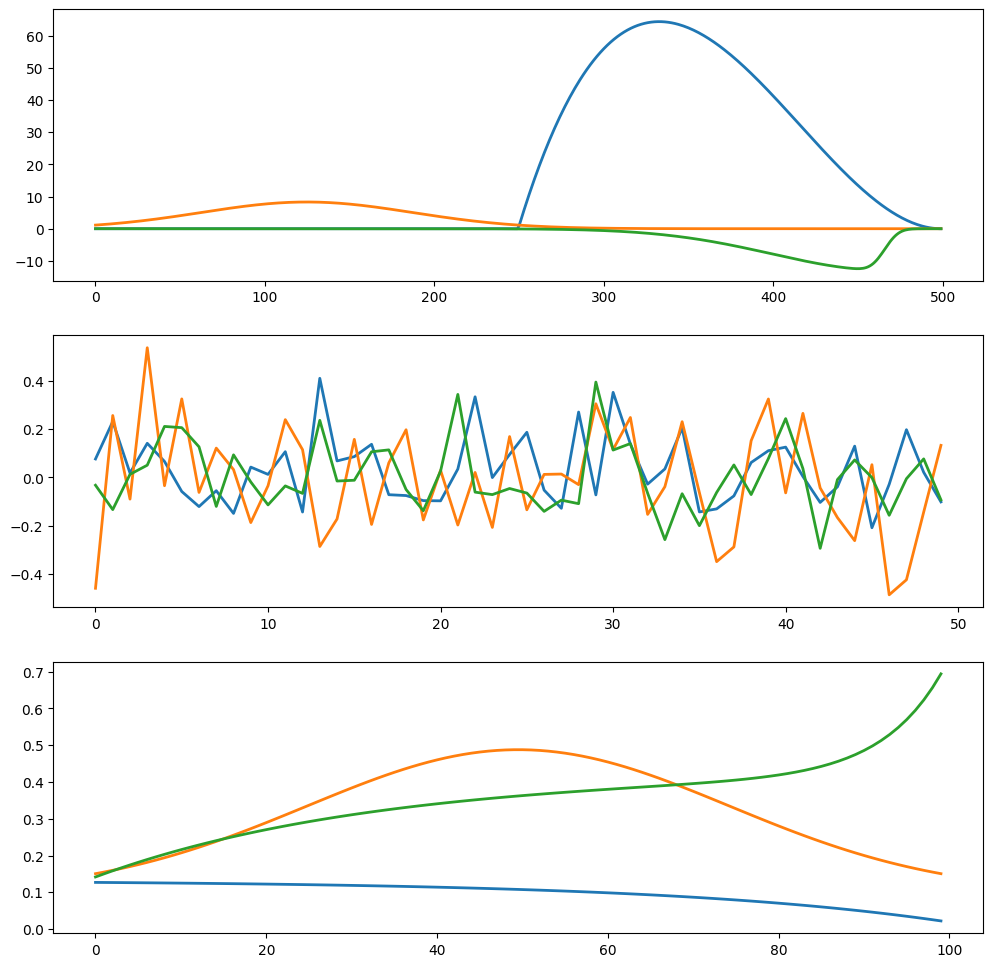

In [ ]:
from tensorly.decomposition import parafac
plt.rcParams['figure.figsize'] = [12,12]


A1, A2 = parafac(X, 3)

fig, axs = plt.subplots(3,1)
axs[0].plot(A2[0],linewidth=2)
axs[1].plot(A2[1],linewidth=2)
axs[2].plot(A2[2],linewidth=2)
plt.show()